In [5]:
import pandas as pd
df_winedataset=pd.read_csv("winedataset.csv")
df_winedataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


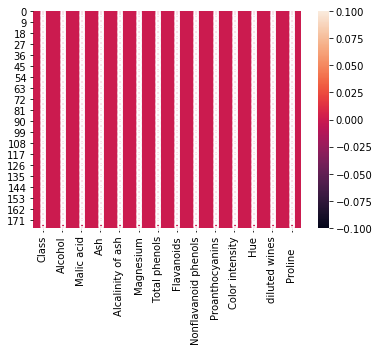

In [8]:
import seaborn as sns
sns.heatmap(df_winedataset.isnull(),annot=True)

In [9]:
df_winedataset.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [11]:
#lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(df_winedataset))
print(df_winedataset.shape)

(178, 14)


In [13]:
df_winedataset_final=df_winedataset.loc[(z_score<2).all(axis=1)]
print(df_winedataset_final.shape)

(121, 14)


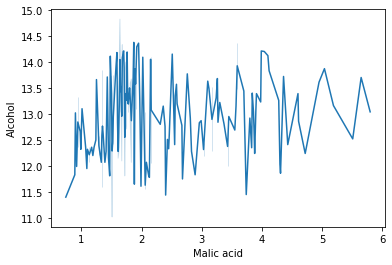

In [17]:
#lets check how alcohaol is changing with respect to malic acid
sns.lineplot(x=df_winedataset["Malic acid"],y=df_winedataset["Alcohol"],data=df_winedataset)


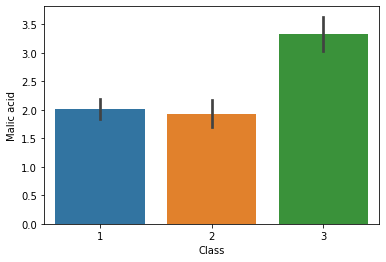

In [19]:
sns.barplot(x=df_winedataset["Class"],y=df_winedataset["Malic acid"],data=df_winedataset)

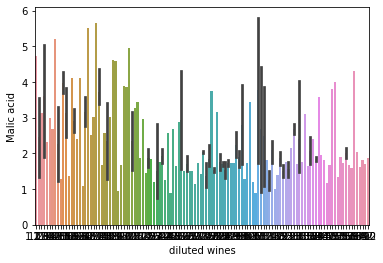

In [26]:
sns.barplot(x=df_winedataset["diluted wines"],y=df_winedataset["Malic acid"],data=df_winedataset)

In [39]:
df_winedataset.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [51]:
x=df_winedataset[["Malic acid"]]
y=df_winedataset[["Alcohol"]]

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=65
for r_state in range(77,101):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)


r2_score corresponding to random state: 77  is:  -0.058900606370208
r2_score corresponding to random state: 78  is:  -0.02031434401566634
r2_score corresponding to random state: 79  is:  -0.09894448967214609
r2_score corresponding to random state: 80  is:  -0.11225251091847555
r2_score corresponding to random state: 81  is:  -0.009719494012127683
r2_score corresponding to random state: 82  is:  0.006820735589437854
r2_score corresponding to random state: 83  is:  -0.00839683926468382
r2_score corresponding to random state: 84  is:  -0.0405158718332026
r2_score corresponding to random state: 85  is:  0.006026900361103649
r2_score corresponding to random state: 86  is:  0.026219675650962615
r2_score corresponding to random state: 87  is:  0.0029835988646294
r2_score corresponding to random state: 88  is:  0.013879335904699919
r2_score corresponding to random state: 89  is:  -0.11722334131621603
r2_score corresponding to random state: 90  is:  -0.003756149576154666
r2_score corresponding 

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring="r2").mean()

-2.436087703505512

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 50,test_size=0.45)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.005433853594349336
RMSE is :  0.8410279877430115


In [88]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lr, 'lr_winedataset.pkl')

C:\Users\RADHE RADHE\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lr_winedataset.pkl']